In [2]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import seaborn as sns
from catboost import Pool, CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append('C:/Users/Petr.Yurchenko/McKinsey_Severstal_Hack_2022')

from server2022.src.train_val import *
from server2022.data.processed.prepare_data import *

In [2]:
# agents2019 = pd.read_csv('../data/raw/agents2019.csv', index_col='Unnamed: 0')
# agents2020 = pd.read_csv('../data/raw/agents2020.csv')
# for c in [col for col in agents2020.columns if 'Факт' in col]:
#     agents2020[c] = agents2020[c].apply(lambda x: float(x) if x not in ['Х', 'Н/Д'] else np.nan)
# agents2021 = pd.read_csv('../data/raw/agents2021.csv', index_col='Unnamed: 0')

# cbr = pd.read_csv('../data/raw/cbr.csv')
# inflation = pd.read_csv('../data/raw/inflation.csv')

In [ ]:
agents2019.head()

,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB"
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0.0,0,0.000000,0,2.895541e+06,6.245860e+06,9.050955e+06,1.889724e+09,1.803724e+09,2.145239e+09,1.928685e+09,1.880842e+09,2.440078e+09,3.583766e+09,3.683359e+09,3.475461e+09,5.159380e+09,5.897326e+09,6.077448e+09,6.294000e+08,6.294000e+08,6.294000e+08,2.673020e+09,2.971017e+09,2.289274e+09,0.000000e+00,0.000000e+00,0.000000e+00,2.498777e+08,2.589732e+08,2.712210e+08,0.000000e+00,0.000000e+00,3.923917e+08,4.080056e+09,4.452922e+09,5.476906e+09,4.165168e+09,4.548178e+09,5.957031e+09,2.667698e+10,4.162693e+10,3.703952e+10,2.156814e+10,3.335443e+10,3.438313e+10,3.179697e+09,6.167667e+09,7.461828e+08,3.280355e+09,6.200120e+09,8.716191e+08
1,1,0,0.0,0,0.000000,0,0.000000e+00,3.885350e+04,3.439490e+04,1.448108e+08,1.487153e+08,1.526427e+08,1.456783e+08,1.497987e+08,1.538924e+08,5.584777e+07,4.678217e+07,1.563478e+08,1.489153e+08,1.898987e+08,2.914637e+08,1.345860e+06,1.345860e+06,1.345860e+06,2.726650e+08,2.774083e+08,3.106586e+08,0.000000e+00,0.000000e+00,0.000000e+00,3.108280e+06,4.528025e+06,5.033758e+06,9.745223e+06,4.760637e+07,6.349873e+07,9.075159e+06,1.015478e+07,6.616497e+07,1.882038e+07,5.776115e+07,1.296637e+08,2.554898e+08,2.573669e+08,5.434306e+08,2.056815e+08,2.055325e+08,4.169796e+08,1.212357e+07,6.944586e+06,4.480064e+07,1.630064e+07,1.109172e+07,5.135732e+07
2,2,7,5.5,1,132825.299363,2,2.468153e+06,1.288025e+07,8.694904e+06,9.698064e+08,9.444166e+08,9.287389e+08,9.732745e+08,1.036412e+09,1.018682e+09,2.814675e+08,2.321070e+08,2.280497e+08,1.286917e+09,1.489083e+09,1.590217e+09,1.964459e+07,1.964459e+07,1.964459e+07,2.110425e+09,2.339440e+09,2.378698e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.339809e+07,1.183121e+07,2.843949e+06,0.000000e+00,0.000000e+00,0.000000e+00,8.246879e+07,8.857197e+07,1.237713e+08,1.363688e+08,1.742242e+08,2.273567e+08,2.786577e+09,2.699397e+09,2.592420e+09,2.038076e+09,2.178598e+09,2.316724e+09,5.026662e+08,3.644229e+08,8.552994e+07,4.148586e+08,1.611318e+08,-9.298981e+07
3,3,0,

In [ ]:
agents2020.head()

,Наименование ДП,Факт. 1,Факт. 2,Факт. 3,Факт. 4,Факт. 5,Факт. 6,Факт. 7,Факт. 8,Факт. 9,Факт. 10,Факт. 11,Факт. 12,Факт. 13,Факт. 14,Факт. 15,Факт. 16,Факт. 17,Факт. 18,Факт. 19,Факт. 20,Факт. 21,Факт. 22,Факт. 23,Факт. 24,Факт. 25,Факт. 26,Факт. 27,Факт. 28,Факт. 29,Факт. 30,Факт. 31,Факт. 32,Факт. 33,Факт. 34,Факт. 35,Факт. 36,Факт. 37,Факт. 38,Факт. 39,Факт. 40,Факт. 41,Факт. 42,Факт. 43,Факт. 44,Факт. 45,Факт. 46,Факт. 47,Факт. 48,Факт. 49,Факт. 50,Факт. 51,Факт. 52,Факт. 53,Факт. 54,Факт. 55,Факт. 56,Факт. 57,Факт. 58,Факт. 59,Факт. 60,Итого,"Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.","Кол-во раз ПДЗ за 2020 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2019, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2019, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2019, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2019, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2019, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2019, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2019, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2019, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB"
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10,6.400000,4,2.229696e+06,5,2.895541e+06,6.245860e+06,9.050955e+06,9.885987e+06,1.889724e+09,1.803724e+09,2.145239e+09,3.606103e+09,1.928685e+09,1.880842e+09,2.440078e+09,3.737611e+09,3.583766e+09,3.683359e+09,3.475461e+09,3.692142e+09,5.159380e+09,5.897326e+09,6.077448e+09,4.981792e+09,6.294000e+08,6.294000e+08,6.294000e+08,6.294000e+08,2.673020e+09,2.971017e+09,2.289274e+09,4.865035e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.498777e+08,2.589732e+08,2.712210e+08,2.764834e+08,0.000000e+00,0.000000e+00,3.923917e+08,0.000000e+00,4.080056e+09,4.452922e+09,5.476906e+09,3.478978e+09,4.165168e+09,4.548178e+09,5.957031e+09,3.

In [ ]:
agents2021.head()

,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.","Кол-во раз ПДЗ за 2020 год, шт.","Оценка потенциала контрагента 1, руб.","Оценка потенциала контрагента 2, руб.",Статус,"2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2019, Нематериальные активы, RUB","2020, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2019, Основные средства , RUB","2020, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2019, Внеоборотные активы, RUB","2020, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2019, Оборотные активы, RUB","2020, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2019, Уставный капитал , RUB","2020, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2019, Заёмные средства (долгосрочные), RUB","2020, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2019, Долгосрочные обязательства, RUB","2020, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2019, Краткосрочные обязательства, RUB","2020, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB",Факт. 20,Факт. 21,Факт.32,Факт.31,Факт.23,Факт 24,Факт 27,Факт 33,Факт 28,Факт 29,Факт 30,Факт 40,Факт 41,Факт 42,Факт 46,Факт 48,Факт 49,Факт 50,Факт 51,Факт 54,Факт 55,Факт 56,Факт 57,Факт 58,Факт 59,Факт 60,Факт 37,Факт 39,Факт 1,Факт 2,Факт 3,Факт 7,Факт 12,Факт 14,Факт 15,Факт 16,Итого,ПДЗ 1-30,ПДЗ 31-90,ПДЗ 91-365,ПДЗ более 365
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0.0,0,0.000000,0,10,6.400000,4,2.229696e+06,5,3.715287e+06,3.715287

In [6]:
agents2019.shape, agents2020.shape, agents2021.shape

((531, 54), (531, 131), (325, 135))

In [15]:
agents2019['Наименование ДП'].unique().shape, agents2020['Наименование ДП'].unique().shape, agents2021['Наименование ДП'].unique().shape

((531,), (531,), (325,))

In [92]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 1
TEST_SIZE = 0.3
BASIC_TRESHOLD = 0.6
N_SPLITS = 5

REPORT_FILE_PATH = '../reports/report.csv'


def fit_predict(model, X_train, y_train, X_test, y_test, treshold=BASIC_TRESHOLD, plot_roc_auc=False):
    print(f'Fitting model {model} with treshold = {round(treshold, 2)}...')
    model.fit(X_train, y_train)
    probas = model.predict_proba(X_test)[:, 1]
    preds = probas.copy()
    preds[np.where(preds < treshold)] = 0
    preds[np.where(preds >= treshold)] = 1
    if plot_roc_auc:
        disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
        plt.show()
    return model, preds, probas


def make_scores(y_test, preds, probas=None):
    print('Validate predictions...')
    f1 = f1_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    acc = accuracy_score(y_test, preds)
    if probas:
        roc_auc = roc_auc_score(y_test, probas)
    else:
        roc_auc = 0
    return f1, precision, recall, acc, roc_auc


def validate_treshold(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    treshold_list = np.arange(0.1, 1, 0.05)
    f1_list, precision_list, recall_list, acc_list = [], [], [], []
    for treshold in treshold_list:
        model, preds, probas = fit_predict(model, X_train, y_train, X_test, y_test, treshold=treshold)
        f1, precision, recall, acc, roc_auc = make_scores(y_test, preds)
        f1_list.append(f1)
        precision_list.append(precision)
        recall_list.append(recall)
        acc_list.append(acc)
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.plot(treshold_list, f1_list, 'r', label='f1')
    ax.plot(treshold_list, precision_list, 'b', label='precision')
    ax.plot(treshold_list, recall_list, 'g', label='recall')
    ax.plot(treshold_list, acc_list, 'k', label='accuracy')
    ax.set_xlabel('treshold')
    ax.set_ylabel('Score')
    ax.legend()
    plt.show()
    

def make_report(model, X, y, treshold=BASIC_TRESHOLD, use_cross_val=True, to_file=False, file_path=REPORT_FILE_PATH, comment=''):
    if use_cross_val:
        skf = StratifiedKFold(n_splits=N_SPLITS, random_state=RANDOM_STATE, shuffle=True)
        f1_list, precision_list, recall_list, acc_list, roc_list = [], [], [], [], []
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model, preds = fit_predict(model, X_train, y_train, X_test, y_test, treshold=treshold, plot_roc_auc=False)
            f1, precision, recall, acc, roc_auc = make_scores(y_test, preds)
            f1_list.append(f1)
            precision_list.append(precision)
            recall_list.append(recall)
            acc_list.append(acc)
            roc_list.append(roc_auc)
        f1 = np.mean(f1_list)
        precision = np.mean(precision_list)
        recall = np.mean(recall_list)
        acc = np.mean(acc_list)
        roc_auc = np.mean(roc_list)
        # f1_std = np.std(f1_list)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
        model, preds = fit_predict(model, X_train, y_train, X_test, y_test, treshold=treshold, plot_roc_auc=True)
        f1, precision, recall, acc, roc_auc = make_scores(y_test, preds)
        
    print('\033[92m' + f'F1 = {round(f1, 4)}, Precision = {round(precision, 4)}, Recall = {round(recall, 4)}' + '\033[0m')
    if to_file:
        res = pd.DataFrame([[str(model.__class__()), model.get_params(), comment, round(treshold, 2), round(roc_auc, 4),
                             round(f1, 4), round(precision, 4), round(recall, 4), round(acc, 4)]], 
                           columns=['model', 'params', 'comment', 'treshold', 'roc_auc', 'f1', 'precision', 'recall', 'acc'])
        if os.path.exists(file_path):
            res.to_csv(file_path, mode='a', header=False, index=False)
        else:
            res.to_csv(file_path, index=False)

In [2]:
df = create_df_0years_known()

In [3]:
df = df.loc[:, [col for col in df.columns if 'Факт' not in col and col != 'Статус']]
df = df.fillna(0)

Fitting model RandomForestClassifier() with treshold = 0.6...


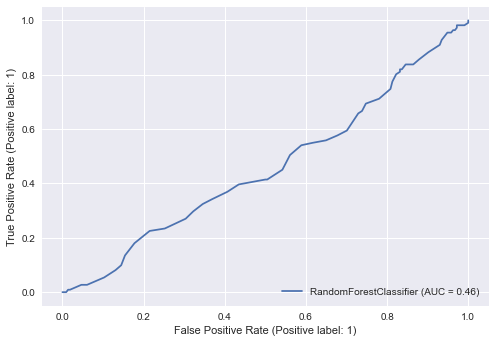

Validate predictions...


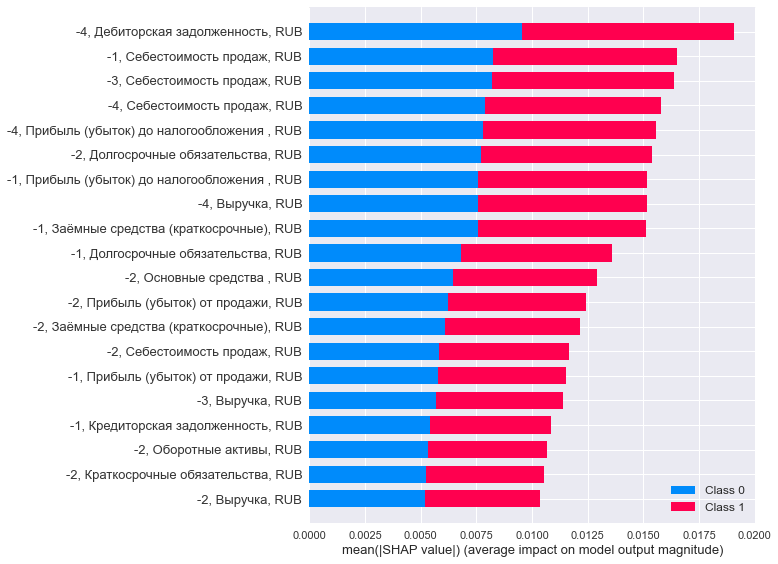

F1 = 0.4426, Precision = 0.3211, Recall = 0.7117, Accuracy = 0.3877, ROC_AUC = 0.4594


In [4]:
model = RandomForestClassifier()
make_report(model, df, comment='sdad')

In [ ]:
model = CatBoostClassifier(iterations=3000,
                           # depth=6.0, 
                           # l2_leaf_reg=4.17, 
                           # learning_rate=0.135,
                           loss_function='Logloss',
                           use_best_model=True,
                           eval_metric='AUC',
                           verbose=False,
                           class_weights=[len(np.where(y_train == 1)[0]) / len(np.where(y_train == 0)[0]), 1],
                           cat_features=cat_features
                          )